# HW5_programQuestion

**Due to 11:59 pm, 18th, November 2020**

**This is an individual assignment.**

In [76]:
"""
Import libraries that you might require
"""

import numpy as np
import math
import matplotlib.pyplot as plt
import operator
import torch
import torchvision
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score
import sklearn.model_selection as ms
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Convolutional Neural Networks  
In this assignment you will be training a Convolutional Neural Network on  
the Fashion MNIST dataset.  

You may find more information about the dataset [here](https://github.com/zalandoresearch/fashion-mnist).  
For this assignment we have already loaded the dataset for you.  
  
You will be using PyTorch for implementing your CNN. 

**We highly recommend following [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for this question** as well as referring to the [official documentation](https://pytorch.org/docs/stable/nn.html) if you are unfamiliar with Pytorch.

## 1. Loading the Dataset
The output of torchvision datasets are PILImage images of range [0, 1].  
We transform them to Tensors of normalized range [-1, 1].  
```Transforms.Normalize((mean,),(std,))``` basically manipulates the values of a pixel such that  
$$New\_Value = \frac{Old\_Value - Mean}{Std}$$



In [77]:
# Define a transform to normalize the data

#TODO : Set the value of mean and the standard deviation to 
#       normalize the image from range [0,1] to the range [-1, 1]


#Begin Your Code

mean = [0.5, 0.5, 0.5]
std = [0.5, 0.5, 0.5]

#End Your Code

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Lambda(lambda x: x.repeat(3,1,1)),
                                transforms.Normalize(mean, std)
                                ])


#TODO : Select suitable value of batch_sizes.

#Begin Your Code

train_batch_size = 128
test_batch_size = 128

#End Your Code

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=train_batch_size, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=test_batch_size, shuffle=True)


# Classes
classes = {       0 :'T-shirt/top',
                  1 :'Trouser',
                  2 :'Pullover',
                  3 :'Dress',
                  4 :'Coat',
                  5 :'Sandal',
                  6 :'Shirt',
                  7 :'Sneaker',
                  8 :'Bag',
                  9 :'Ankle boot'}

## 2. The Dataset
Here we show some images of the dataset.  
See how many of the categories can you recognise.



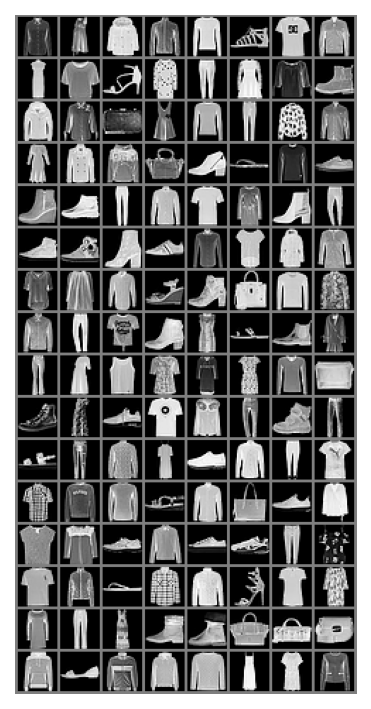

In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

# Functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    
    figure(num=None, figsize=(8, 6), dpi=150, edgecolor='k')
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

## 3. Create your Convolutional Neural Network

In [79]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,64,3)
        self.conv2 = nn.Conv2d(64,64,3,padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)

        self.conv3 = nn.Conv2d(64,128,3)
        self.conv4 = nn.Conv2d(128,128,3,padding=1)
        self.pool2 = nn.MaxPool2d(2, 2, padding=1)

        self.fc5 = nn.Linear(128*6*6,512)
        self.drop1 = nn.Dropout()
        self.fc7 = nn.Linear(512,10)

    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)


        x = self.conv3(x)
        x = F.relu(x)
        x = self.conv4(x)
        x = F.relu(x)
        x = self.pool2(x)

        x = x.view(-1,128*6*6)
        x = self.fc5(x)
        x = F.relu(x)
        x = self.drop1(x)
        x = self.fc7(x)
       
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net = net.to(device)

## 4. Define a Loss function and optimizer
We will be using [Cross Entropy Loss](https://pytorch.org/docs/stable/nn.html?highlight=crossentropyloss#torch.nn.CrossEntropyLoss) and [Adam optimizer](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam).  
Note: PyTorch's CrossEntropyLoss combines log softmax and negative log likelihood loss in one class. Make sure you are not computing softmax twice.



In [80]:
import torch.optim as optim

#TODO : Use appropriate loss criterion and optimizer 

#Begin Your Code

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), 1e-4)

#End Your Code

## 5. Train the network

Here we are going to train the network while logging the per batch metrics.  
This would take some time to run (5-10 minutes).



In [81]:
overall_step = 0

#TODO : Select appropriate number of epochs

#Begin Your Code

epochs = 10

#End Your Code


for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        #TODO : Make predictions, calculate accuracy and update your weights once

        #Begin Your Code
        net.zero_grad()
        output = net(inputs)
        output = output.squeeze()
        
        # zero the parameter gradients
        # forward + backward + optimize
        loss = criterion(output, labels.long())
        loss.backward()
        optimizer.step()
        #End Your Code

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print('Epoch: %d, Batch: %5d, loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 200))
            '''
            running_loss = 0.0
            accuracy = accuracy_score(output, labels)

            #Any thing that is added to the "info" gets plotted in tensorboard
            #TODO : Add the plots in Tensorboard to the report and explain what is happening
            info = { ('loss') : loss.item(),('accuracy'): accuracy.item()}
            for tag, value in info.items():
                logger.scalar_summary(tag, value, overall_step+1)
            '''
print('Finished Training')

Epoch: 1, Batch:   200, loss: 0.948
Epoch: 1, Batch:   400, loss: 1.480
Epoch: 2, Batch:   200, loss: 0.431
Epoch: 2, Batch:   400, loss: 0.825
Epoch: 3, Batch:   200, loss: 0.353
Epoch: 3, Batch:   400, loss: 0.696
Epoch: 4, Batch:   200, loss: 0.313
Epoch: 4, Batch:   400, loss: 0.626
Epoch: 5, Batch:   200, loss: 0.290
Epoch: 5, Batch:   400, loss: 0.575
Epoch: 6, Batch:   200, loss: 0.262
Epoch: 6, Batch:   400, loss: 0.531
Epoch: 7, Batch:   200, loss: 0.249
Epoch: 7, Batch:   400, loss: 0.499
Epoch: 8, Batch:   200, loss: 0.233
Epoch: 8, Batch:   400, loss: 0.466
Epoch: 9, Batch:   200, loss: 0.222
Epoch: 9, Batch:   400, loss: 0.440
Epoch: 10, Batch:   200, loss: 0.208
Epoch: 10, Batch:   400, loss: 0.412
Finished Training


## 6. Test Accuracy
Let us look at how the network performs on the test dataset.  
Report your accuracy in your report.



In [82]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

#TODO : Report this accuracy in your report.

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 90 %


## 7. Per Class accuracy
Now we see the test accuracy for each class in the test dataset.  
Report these accuracies in your report. Also identify the problematic classes.  
Can you explain why these classes have significantly lower accuracies compared to other classes?


In [83]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 80 %
Accuracy of Trouser : 96 %
Accuracy of Pullover : 85 %
Accuracy of Dress : 92 %
Accuracy of  Coat : 83 %
Accuracy of Sandal : 97 %
Accuracy of Shirt : 59 %
Accuracy of Sneaker : 100 %
Accuracy of   Bag : 96 %
Accuracy of Ankle boot : 100 %
